In [5]:
!pip install xgboost


In [6]:
!pip install catboost

In [7]:
pip install --upgrade numpy


  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.


In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv('data/raw.csv')

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
x = df.drop(columns=['math_score'],axis =1)
y = df['math_score']

In [14]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder

numeric_transform = StandardScaler()
oh_transform = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("onehotencoder",oh_transform,cat_features),
    ('StandardScaler',numeric_transform,num_features)
])

In [15]:
x = preprocessor.fit_transform(x)

In [16]:
x.shape

(1000, 19)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
x_train.shape,y_train.shape

((800, 19), (800,))

In [18]:
from sklearn.metrics import mean_absolute_error
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)

    return mae,rmse,r2_square 

In [20]:
models = {
    'LinearRegressor':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "XGBRegressor":XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for training set")
    print("-Root mean squared error : {:.4f}".format(model_train_rmse))
    print("-Root mean absolute error : {:.4f}".format(model_train_mae))
    print("-Root mean r2 score : {:.4f}".format(model_train_r2))

    print('-------------------------------------------------------')

    print("Model Performance for test set")
    print("-Root mean squared error : {:.4f}".format(model_test_rmse))
    print("-Root mean absolute error : {:.4f}".format(model_test_mae))
    print("-Root mean r2 score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("="*35)
    print('\n')

LinearRegressor
Model Performance for training set
-Root mean squared error : 5.3231
-Root mean absolute error : 4.2667
-Root mean r2 score : 0.8743
-------------------------------------------------------
Model Performance for test set
-Root mean squared error : 5.3940
-Root mean absolute error : 4.2148
-Root mean r2 score : 0.8804


Lasso
Model Performance for training set
-Root mean squared error : 6.5938
-Root mean absolute error : 5.2063
-Root mean r2 score : 0.8071
-------------------------------------------------------
Model Performance for test set
-Root mean squared error : 6.5197
-Root mean absolute error : 5.1579
-Root mean r2 score : 0.8253


Ridge
Model Performance for training set
-Root mean squared error : 5.3233
-Root mean absolute error : 4.2650
-Root mean r2 score : 0.8743
-------------------------------------------------------
Model Performance for test set
-Root mean squared error : 5.3904
-Root mean absolute error : 4.2111
-Root mean r2 score : 0.8806


KNeighborsRe

In [21]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model name,r2_score
2,Ridge,0.880593
0,LinearRegressor,0.880433
5,RandomForestRegressor,0.851421
6,AdaBoostRegressor,0.849615
7,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.759800


In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Accuracy score is %.2f"%score)

Accuracy score is 0.88


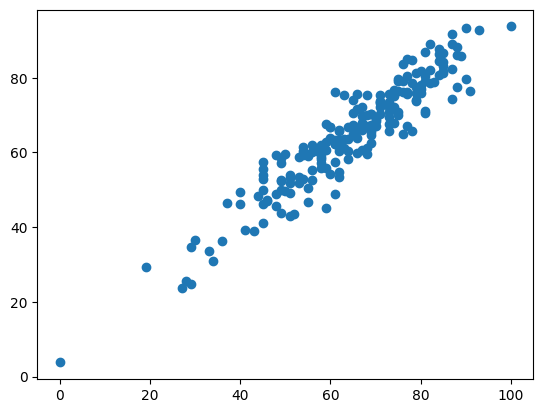

In [23]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

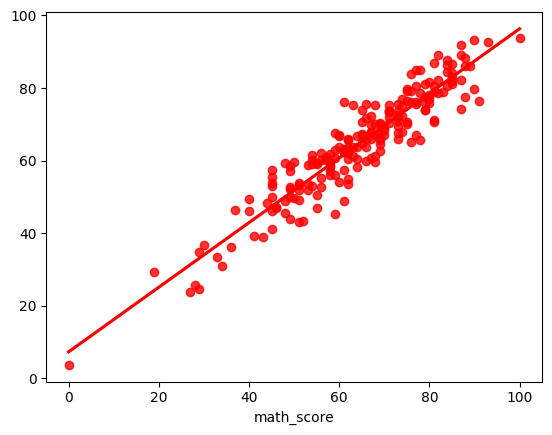

In [26]:
sns.regplot(x=y_test,y=y_pred,ci = None,color = "red")